In [2]:
"""
Data Preparation:
Download heart dataset from following link.
https://www.kaggle.com/zhaoyingzhu/heartcsv
Perform following operation on given dataset.
a) Find Shape of Data
b) Find Missing Values
c) Find data type of each column
d) Finding out Zero's
e) Find Mean age of patients
f) Now extract only Age, Sex, ChestPain, RestBP, Chol. Randomly divide dataset in training (75%) and
testing (25%).
Through the diagnosis test I predicted 100 report as COVID positive, but only 45 of those were actually
positive. Total 50 people in my sample were actually COVID positive. I have total 500 samples.
Create confusion matrix based on above data and find
I I. Accuracy
II II. Precision
III III. Recall
IV. F-1 score
"""

"\nData Preparation:\nDownload heart dataset from following link.\nhttps://www.kaggle.com/zhaoyingzhu/heartcsv\nPerform following operation on given dataset.\na) Find Shape of Data\nb) Find Missing Values\nc) Find data type of each column\nd) Finding out Zero's\ne) Find Mean age of patients\nf) Now extract only Age, Sex, ChestPain, RestBP, Chol. Randomly divide dataset in training (75%) and\ntesting (25%).\nThrough the diagnosis test I predicted 100 report as COVID positive, but only 45 of those were actually\npositive. Total 50 people in my sample were actually COVID positive. I have total 500 samples.\nCreate confusion matrix based on above data and find\nI I. Accuracy\nII II. Precision\nIII III. Recall\nIV. F-1 score\n"

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [44]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,52,1,0,125.0,87,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145.0,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125.0,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110.0,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110.0,254,0,0,159,0,0.0,2,0,2,1


In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,52,1,0,125.0,87,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145.0,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0


In [46]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140.0,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125.0,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110.0,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110.0,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120.0,188,0,1,113,0,1.4,1,1,3,0


In [47]:
a=df.iloc[0:299,1:10].to_string()
print(a)

     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak
0      1   0     125.0   212    0        1      168      0      1.0
1      1   0     125.0    87    0        1      168      0      1.0
2      1   0     145.0   174    0        1      125      1      2.6
3      1   0     148.0   203    0        1      161      0      0.0
4      0   0     138.0   294    1        1      106      0      1.9
5      0   0     100.0   248    0        0      122      0      1.0
6      1   0       NaN   318    0        2      140      0      4.4
7      1   0     160.0   289    0        0      145      1      0.8
8      1   0     120.0   249    0        0      144      0      0.8
9      1   0     122.0   286    0        0      116      1      3.2
10     0   0     112.0   149    0        1      125      0      1.6
11     0   0     132.0   341    1        0      136      1      3.0
12     0   1     118.0   210    0        1      192      0      0.7
13     1   0     140.0   298    0        1      

In [48]:
df.iloc[0:1025,2:7].to_string().split("\n")

['      cp  trestbps  chol  fbs  restecg',
 '0      0     125.0   212    0        1',
 '1      0     125.0    87    0        1',
 '2      0     145.0   174    0        1',
 '3      0     148.0   203    0        1',
 '4      0     138.0   294    1        1',
 '5      0     100.0   248    0        0',
 '6      0       NaN   318    0        2',
 '7      0     160.0   289    0        0',
 '8      0     120.0   249    0        0',
 '9      0     122.0   286    0        0',
 '10     0     112.0   149    0        1',
 '11     0     132.0   341    1        0',
 '12     1     118.0   210    0        1',
 '13     0     140.0   298    0        1',
 '14     0     128.0   204    1        1',
 '15     1     118.0   210    0        1',
 '16     2     140.0   308    0        0',
 '17     0     124.0   266    0        0',
 '18     1     120.0   244    0        1',
 '19     2     140.0   211    1        0',
 '20     2     140.0   185    0        0',
 '21     0     106.0   223    0        1',
 '22     0 

In [49]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1024.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.433171,0.695610,0.942439,131.614258,245.886829,0.148293,0.530732,149.126829,0.335610,1.069463,1.387317,0.756098,2.323902,0.513171
std,9.072498,0.460373,1.029641,17.515881,51.813677,0.355563,0.527822,23.012554,0.472434,1.173342,0.616533,1.031262,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,87.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [50]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [51]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    1
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [52]:
df.median()

age          56.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     152.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [53]:
df1=df.fillna(df.median())
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,52,1,0,125.0,87,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145.0,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125.0,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110.0,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110.0,254,0,0,159,0,0.0,2,0,2,1


In [54]:
df1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [55]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    1
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [56]:
df2 = df.fillna(df.mean())
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,52,1,0,125.0,87,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145.0,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125.0,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110.0,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110.0,254,0,0,159,0,0.0,2,0,2,1


In [57]:
df2.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [58]:
df1=df.drop_duplicates()
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,52,1,0,125.0,87,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145.0,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120.0,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108.0,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128.0,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160.0,273,0,0,125,0,0.0,2,0,2,0


In [59]:
X=df.iloc[0:1026,1:6]
y=df.iloc[0:1026,3:6]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('Y_train : ')
print(y_train.head())
print('')
print('Y_test : ')
print(y_test.head())
print('')

X_train : 
      sex  cp  trestbps  chol  fbs
949     1   0     132.0   207    0
1021    1   0     125.0   258    0
94      1   1     128.0   208    1
33      1   2     160.0   269    0
259     1   0     120.0   302    0

X_test : 
     sex  cp  trestbps  chol  fbs
527    0   0     124.0   209    0
359    0   2     128.0   216    0
447    1   0     160.0   289    0
31     0   1     120.0   244    0
621    1   0     130.0   256    1

Y_train : 
      trestbps  chol  fbs
949      132.0   207    0
1021     125.0   258    0
94       128.0   208    1
33       160.0   269    0
259      120.0   302    0

Y_test : 
     trestbps  chol  fbs
527     124.0   209    0
359     128.0   216    0
447     160.0   289    0
31      120.0   244    0
621     130.0   256    1



In [60]:
X

,sex,cp,trestbps,chol,fbs
0,1,0,125.0,212,0
1,1,0,125.0,87,0
2,1,0,145.0,174,0
3,1,0,148.0,203,0
4,0,0,138.0,294,1
...,...,...,...,...,...
1020,1,1,140.0,221,0
1021,1,0,125.0,258,0
1022,1,0,110.0,275,0
1023,0,0,110.0,254,0


In [61]:
y

,trestbps,chol,fbs
0,125.0,212,0
1,125.0,87,0
2,145.0,174,0
3,148.0,203,0
4,138.0,294,1
...,...,...,...
1020,140.0,221,0
1021,125.0,258,0
1022,110.0,275,0
1023,110.0,254,0


In [62]:
a = df.duplicated().sum()
a

721

In [63]:
zeros_count = (df == 0).sum()
print("Zeros Count:")
print(zeros_count)

Zeros Count:
age           0
sex         312
cp          497
trestbps      0
chol          0
fbs         873
restecg     496
thalach       0
exang       681
oldpeak     329
slope        73
ca          577
thal          7
target      499
dtype: int64


In [64]:
df1 = df.fillna(df.median())
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,52,1,0,125.0,87,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145.0,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125.0,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110.0,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110.0,254,0,0,159,0,0.0,2,0,2,1


In [65]:
df1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [66]:
df = df1.astype({"chol":int,"trestbps":int,"oldpeak":int})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1,2,2,3,0
1,52,1,0,125,87,0,1,168,0,1,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0,2,0,2,1


In [67]:
df.shape

(1025, 14)

In [68]:
df1.shape

(1025, 14)

In [69]:
X = df.drop("target" , axis = "columns")
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1,2,2,3
1,52,1,0,125,87,0,1,168,0,1,2,2,3
2,70,1,0,145,174,0,1,125,1,2,0,0,3
3,61,1,0,148,203,0,1,161,0,0,2,1,3
4,62,0,0,138,294,1,1,106,0,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2,1,1,3
1022,47,1,0,110,275,0,0,118,1,1,1,1,2
1023,50,0,0,110,254,0,0,159,0,0,2,0,2


In [70]:
y = df["target"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [72]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1,2,2,3
1,52,1,0,125,87,0,1,168,0,1,2,2,3
2,70,1,0,145,174,0,1,125,1,2,0,0,3
3,61,1,0,148,203,0,1,161,0,0,2,1,3
4,62,0,0,138,294,1,1,106,0,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2,1,1,3
1022,47,1,0,110,275,0,0,118,1,1,1,1,2
1023,50,0,0,110,254,0,0,159,0,0,2,0,2


In [73]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [74]:
X_train.shape

(768, 13)

In [75]:
y_train.shape

(768,)

In [76]:
Reg = LogisticRegression()
Reg.fit(X_train,y_train)

C:\Users\SAHIL GUNJAL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
y_pred = Reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [78]:
print(accuracy_score(y_test, y_pred))

0.8715953307392996


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       122
           1       0.85      0.91      0.88       135

    accuracy                           0.87       257
   macro avg       0.87      0.87      0.87       257
weighted avg       0.87      0.87      0.87       257



In [80]:
print(confusion_matrix(y_test, y_pred))

[[101  21]
 [ 12 123]]


<Axes: >

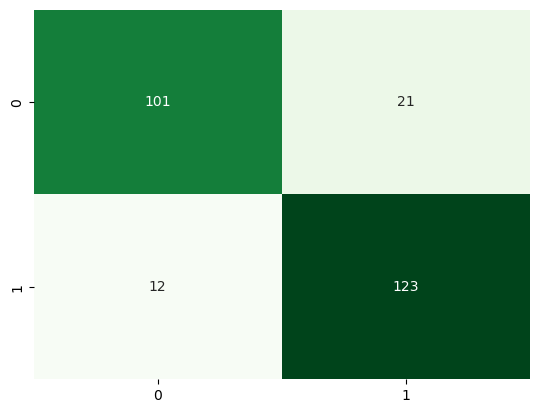

In [81]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True,fmt='g',cmap='Greens', cbar=False)